In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.gridspec import GridSpec
# if getting error, please mute the three lines below
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer
from scipy.integrate import solve_ivp

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16

# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16

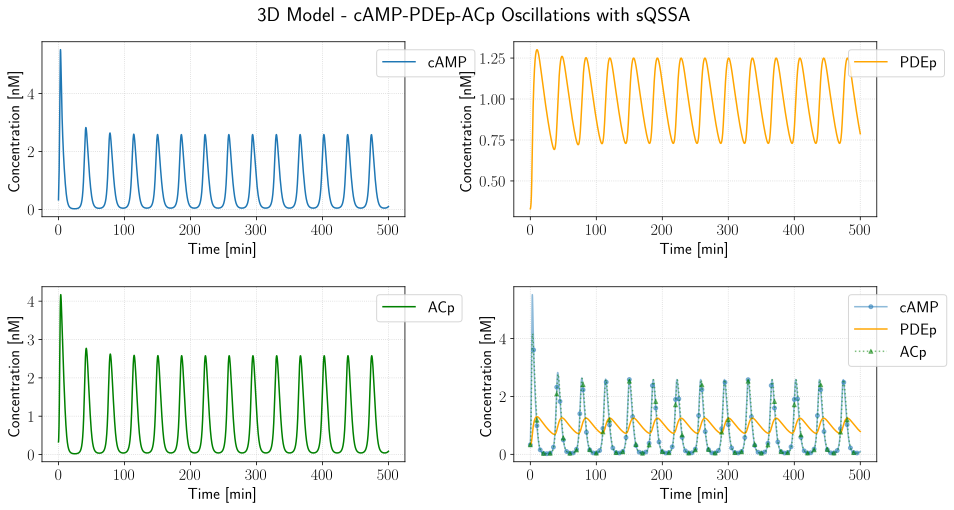

In [43]:
def cAMP_PDEp_ACp(t, x):
    cAMP = x[0]
    PDEp = x[1]
    ACp = x[2]

    dPDEp  = r3 * cAMP * ((PDEt - PDEp) / Km3) - r4 * Et * PDEp / (Km4 + PDEp)
    dACp = r1 * cAMP * ((ACt-ACp) / Km1) - r2 * Dt * ACp / (Km2 + ACp)
    dcAMP = + k1 * ACp - (k3 + k2 * PDEp) * cAMP
    return [dcAMP, dPDEp, dACp]

k = 0.9
k1, k3, k2 = 4.32/k, 0.58/k, 3.73/k
r1, r2, r3, r4 = 0.98/k, 4.48/k, 0.1/k, 0.14/k
Km1, Km2, Km3, Km4 = 2.48, 3.34, 9.24, 7.24
Dt, Et =  2.12, 1.6
ACt = 6.68
PDEt = 4.64

x0 = [0.33, 0.33, 0.33]

solver = solve_ivp(cAMP_PDEp_ACp, [0, 1000], x0, t_eval=np.linspace(0, 500, 10000), method='RK45')


cAMP, PDEp, ACp = solver.y

fig = plt.figure(figsize=(16, 12))
fig.suptitle("3D Model - cAMP-PDEp-ACp Oscillations with sQSSA", fontsize=20, y=0.92)
gs = GridSpec(3, 2, figure=fig)
legend_position = {'bbox_to_anchor': (0.9, 1), 'loc': 'upper left'}

ax0 = fig.add_subplot(gs[0, 0])
ax0.grid(True, linestyle=':', color='lightgray')
ax0.plot(solver.t, cAMP, label='cAMP', color='#1f77b4')
ax0.set_xlabel('Time [min]')
ax0.set_ylabel('Concentration [nM]')
ax0.legend(**legend_position, fontsize=16)

ax1 = fig.add_subplot(gs[0, 1])
ax1.grid(True, linestyle=':', color='lightgray')
ax1.plot(solver.t, PDEp, label='PDEp', color='orange')
ax1.set_xlabel('Time [min]')
ax1.set_ylabel('Concentration [nM]')
ax1.legend(**legend_position, fontsize=16)

ax2 = fig.add_subplot(gs[1, 0])
ax2.grid(True, linestyle=':', color='lightgray')
ax2.plot(solver.t, ACp, label='ACp', color='green')
ax2.set_xlabel('Time [min]')
ax2.set_ylabel('Concentration [nM]')
ax2.legend(**legend_position, fontsize=16)

ax3 = fig.add_subplot(gs[1, 1])
ax3.grid(True, linestyle=':', color='lightgray')
ax3.plot(solver.t, cAMP, label='cAMP', color='#1f77b4', linestyle='-', alpha=0.5, marker='o', markersize=4, markevery=100,  linewidth= 1.5)
ax3.plot(solver.t, PDEp, label='PDEp', color='orange', linestyle='-')
ax3.plot(solver.t, ACp, label='ACp', color='green', linestyle=':', alpha=0.5, marker='^', markersize=4, markevery=200, linewidth = 1.5)
ax3.set_xlabel('Time [min]')
ax3.set_ylabel('Concentration [nM]')

ax3.legend(**legend_position, fontsize=16)
fig.subplots_adjust(wspace=0.3, hspace=0.4, right=0.85)
fig.savefig('cAMP_PDEp_ACp.png', dpi=300, bbox_inches='tight')

plt.show()

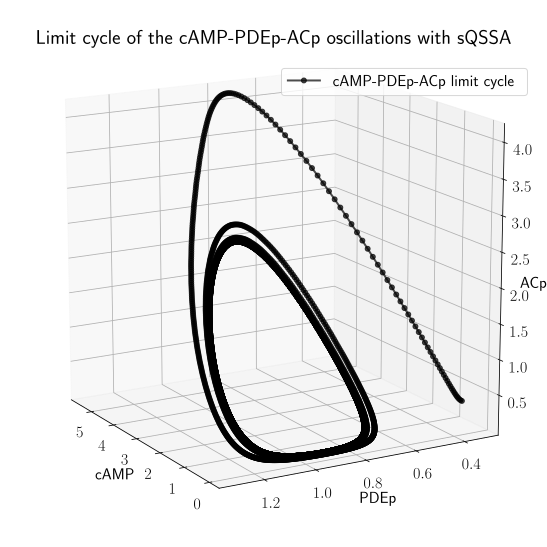

In [44]:
fig_3d = plt.figure(figsize=(10, 10))
ax_3d = fig_3d.add_subplot(111, projection='3d')
plt.subplots_adjust(top=0.85)

ax_3d.plot(cAMP, PDEp, ACp, label='cAMP-PDEp-ACp limit cycle', color='black', linestyle='-', linewidth=2, alpha=0.7, marker='o', markersize=5)
ax_3d.set_title('Limit cycle of the cAMP-PDEp-ACp oscillations with sQSSA', y=1)
ax_3d.set_xlabel('cAMP', fontsize=16, labelpad=5)
ax_3d.set_ylabel('PDEp', fontsize=16, labelpad=5)
ax_3d.set_zlabel('ACp', fontsize=16, labelpad=-1)

ax_3d.legend(fontsize=16, bbox_to_anchor=(0.5, 0.9))


ax_3d.view_init(15,150)
ax_3d.set_box_aspect([1, 1, 1])
ax_3d.grid(True, linestyle=':', color='lightgray')

plt.savefig('3DcAMP_PDEp_ACp_limit_cycle_sQSSA.png', dpi=300, bbox_inches='tight')
plt.show()